In [1]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from data_loader.load_data import ImagesLoader

from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier, \
                             AdaBoostClassifier, \
                             ExtraTreesClassifier

from sklearn.dummy import DummyClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report, \
                            confusion_matrix, \
                            ConfusionMatrixDisplay

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 1000)

In [3]:
DATASET_NAME = 'simpsons-small'
PIPELINE_NAME = 'images_resized'

# **CARREGANDO OS DADOS**

In [4]:
loader = ImagesLoader(train_images_path='../data/train/',
                      test_images_path='../data/test/')

data = loader.load_data(load_list='original')

names_files loaded
names_paths loaded
names_characters loaded
names_encoded loaded
images_original loaded
images_filtered loaded
images_resized loaded


In [5]:
print('names_characters')
print(np.array(data['names_characters']['train']).shape,
      np.array(data['names_characters']['test']).shape, end='\n\n')

print(PIPELINE_NAME)
print(np.array(data[PIPELINE_NAME]['train']).shape,
      np.array(data[PIPELINE_NAME]['test']).shape)

names_characters
(253,) (106,)

images_resized
(253, 309, 387) (106, 309, 387)


# **TRAIN-TEST SPLIT**

In [6]:
# tornando cada imagem 1d

resized_train = data[PIPELINE_NAME]['train']
resized_test = data[PIPELINE_NAME]['test']

X_train = np.reshape(resized_train, (len(resized_train), -1))
y_train = np.array(data['names_encoded']['train'])

X_test = np.reshape(resized_test, (len(resized_test), -1))
y_test = np.array(data['names_encoded']['test'])

X_train.shape, X_test.shape

((253, 119583), (106, 119583))

# **PIPELINE DE MODELOS**

In [8]:
models = {
    'knn': KNeighborsClassifier(),
    'nb': GaussianNB(),
    'lsvc': LinearSVC(),
    'svc': SVC(),
    'lr': LogisticRegression(),
    'rf': RandomForestClassifier(),
    'lgbm': LGBMClassifier(),
    'xgb': XGBClassifier(),
    'ab': AdaBoostClassifier(),
    'et': ExtraTreesClassifier(),
    'mlp': MLPClassifier(),
    'dc': DummyClassifier(strategy='stratified')
}

preds = {}
results = {}

In [9]:
# treinando e realizando as predições

for name, model in zip(list(models.keys()), list(models.values())):    
    pipe = Pipeline([
        ('scaler', MinMaxScaler(feature_range=(0,1))),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    preds[name] = y_pred
    results[name] = classification_report(y_test, y_pred, output_dict=True)
        
    print(name, 'completed')

knn completed
nb completed
lsvc completed
svc completed
lr completed
rf completed
lgbm completed
xgb completed
ab completed
et completed
mlp completed
dc completed


# **EXIBIÇÃO DOS RESULTADOS**

In [10]:
# criando um df de resultados dos modelos

for name, result, i in zip(list(results.keys()),
                           list(results.values()),
                           range(len(results))): 
    # df do classification report 
    df_report = pd.DataFrame(data=results[name]).T

    # dicionário para decodificar labels
    decoded_labels = {value: key for value, key in zip(list(loader.encoded_labels.values()),
                                                       list(loader.encoded_labels.keys()))}

    # decodificando labels
    df_report.index = list(map(lambda field: decoded_labels[int(field)] \
                               if field in np.array(list(loader.encoded_labels.values())).astype(str) \
                               else field, list(df_report.index)))

    # definindo index com o modelo
    arrays = [[name for i in range(9)], df_report.T.columns]
    tuples = list(zip(*arrays))
    index = pd.MultiIndex.from_tuples(tuples, names=['model', 'labels'])
    df_report.index = index

    # mesclando os df_reports
    if i == 0:
        df_results = df_report
    else:
        df_results = pd.concat([df_results, df_report], axis=0)

df_results

precision    recall  f1-score     support
model labels                                                 
knn   homer          0.339623  0.720000  0.461538   25.000000
      marge          1.000000  0.300000  0.461538   10.000000
      bart           0.000000  0.000000  0.000000   35.000000
      lisa           0.285714  0.307692  0.296296   13.000000
      maggie         0.285714  0.666667  0.400000   12.000000
      family         1.000000  0.181818  0.307692   11.000000
      accuracy       0.330189  0.330189  0.330189    0.330189
      macro avg      0.485175  0.362696  0.321178  106.000000
      weighted avg   0.345598  0.330189  0.265946  106.000000
nb    homer          0.263158  0.400000  0.317460   25.000000
      marge          0.333333  0.300000  0.315789   10.000000
      bart           0.285714  0.342857  0.311688   35.000000
      lisa           0.000000  0.000000  0.000000   13.000000
      maggie         0.200000  0.166667  0.181818   12.000000
      family         0.333333  0.090909  0.142857   11.000000
      accuracy       0.264151  0.264151  0.264151    0.264151
      macro avg      0.235923  0.216739  0.211602  106.000000
      weighted avg   0.245084  0.264151  0.242988  106.000000
lsvc  homer          0.250000  0.320000  0.280702   25.000000
      marge          0.555556  0.500000  0.526316   10.000000
      bart           0.384615  0.285714  0.327869   35.000000
      lisa           0.187500  0.230769  0.206897   13.000000
      maggie         0.357143  0.416667  0.384615   12.000000
      family         0.222222  0.181818  0.200000   11.000000
      accuracy       0.311321  0.311321  0.311321    0.311321
      macro avg      0.326173  0.322495  0.321066  106.000000
      weighted avg   0.324856  0.311321  0.313784  106.000000
svc   homer          0.187500  0.120000  0.146341   25.000000
      marge          0.666667  0.200000  0.307692   10.000000
      bart           0.325301  0.771429  0.457627   35.000000
      lisa           0.333333  0.076923  0.125000   13.000000
      maggie         1.000000  0.083333  0.153846   12.000000
      family         0.000000  0.000000  0.000000   11.000000
      accuracy       0.320755  0.320755  0.320755    0.320755
      macro avg      0.418800  0.208614  0.198418  106.000000
      weighted avg   0.368614  0.320755  0.247392  106.000000
lr    homer          0.214286  0.240000  0.226415   25.000000
      marge          0.555556  0.500000  0.526316   10.000000
      bart           0.411765  0.400000  0.405797   35.000000
      lisa           0.214286  0.230769  0.222222   13.000000
      maggie         0.400000  0.500000  0.444444   12.000000
      family         0.333333  0.181818  0.235294   11.000000
      accuracy       0.339623  0.339623  0.339623    0.339623
      macro avg      0.354871  0.342098  0.343415  106.000000
      weighted avg   0.345065  0.339623  0.339027  106.000000
rf    homer          0.375000  0.360000  0.367347   25.000000
      marge          0.666667  0.400000  0.500000   10.000000
      bart           0.406250  0.742857  0.525253   35.000000
      lisa           0.666667  0.307692  0.421053   13.000000
      maggie         1.000000  0.416667  0.588235   12.000000
      family         1.000000  0.090909  0.166667   11.000000
      accuracy       0.462264  0.462264  0.462264    0.462264
      macro avg      0.685764  0.386354  0.428092  106.000000
      weighted avg   0.584218  0.462264  0.442767  106.000000
lgbm  homer          0.366667  0.440000  0.400000   25.000000
      marge          1.000000  0.500000  0.666667   10.000000
      bart           0.488889  0.628571  0.550000   35.000000
      lisa           0.333333  0.307692  0.320000   13.000000
      maggie         0.714286  0.416667  0.526316   12.000000
      family         0.428571  0.272727  0.333333   11.000000
      accuracy       0.471698  0.471698  0.471698    0.471698
      macro avg      0.555291  0.427610  0.466053  106.000000
      weighted avg   0.508461  0.471698  0.472256  1

In [10]:
# # salvar resultados?
# df_results.to_csv(f'../output/pipeline_{PIPELINE_NAME}_results.csv')

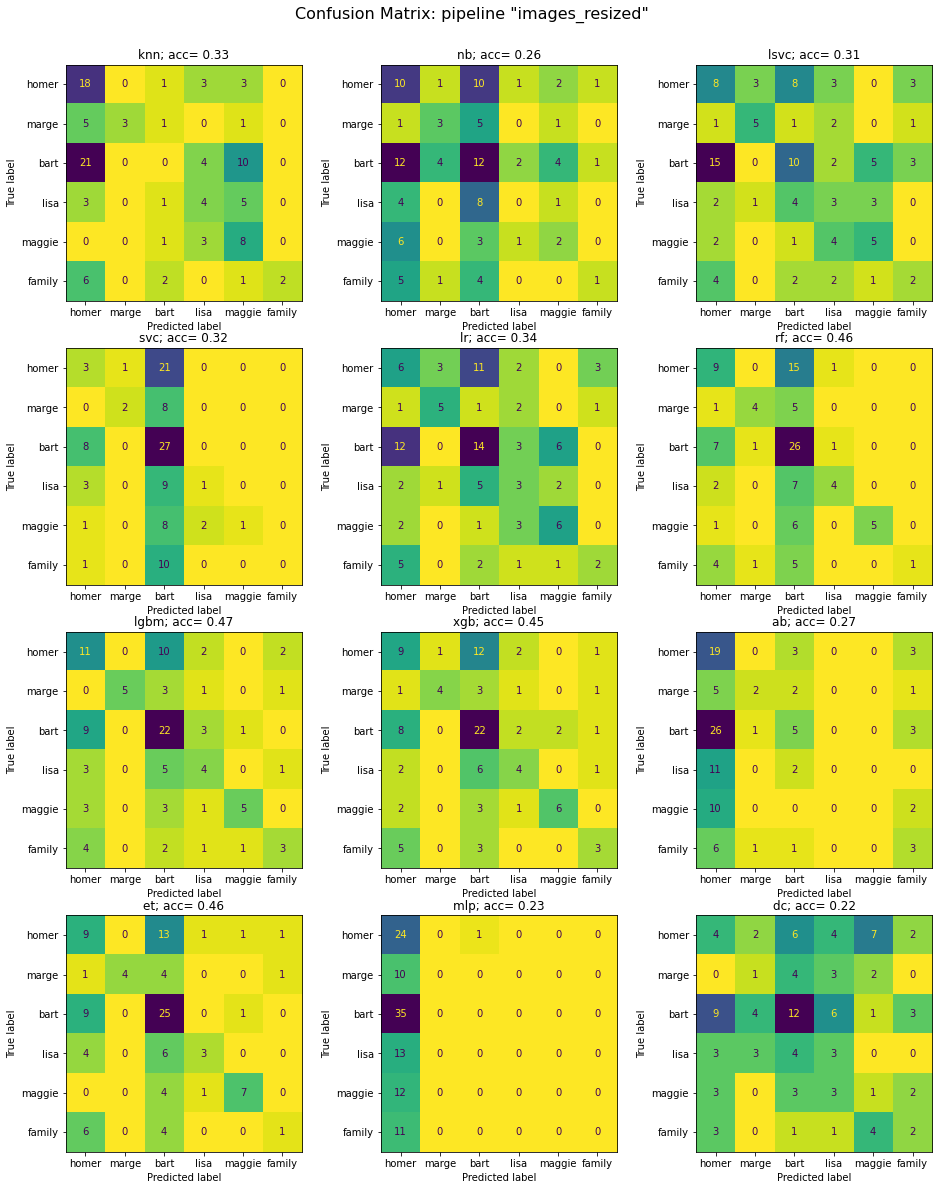

In [11]:
# exibindo a matriz de confusão dos modelos

fig, ax = plt.subplots(4,3, figsize=(16,20))

fig.text(x=.5,
            y=.92,
            s=f'Confusion Matrix: pipeline "{PIPELINE_NAME}"\ndataset="{DATASET_NAME}"',
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16)

for name, pred, i in zip(list(preds.keys()),
                            list(preds.values()),
                            range(len(preds))):
    
    cm = confusion_matrix(y_test, pred)
    cm_plot = ConfusionMatrixDisplay(cm, display_labels=loader.labels)
    cm_plot.plot(cmap='viridis_r', ax=ax.ravel()[i]);
    cm_plot.im_.colorbar.remove()

    ax.ravel()[i].set_title(f"{name}; accuracy = " \
                            f"{round(results[name]['accuracy'], 2)}; " \
                            f"weight f1 = " \
                            f"{round(results[name]['weighted avg']['f1-score'], 2)}");

# plt.savefig(f'../images/pipeline_{PIPELINE_NAME}_cm.jpg')